In [1]:
from matplotlib.image import imread 
import matplotlib.pyplot as plt 
import numpy as np 
import os

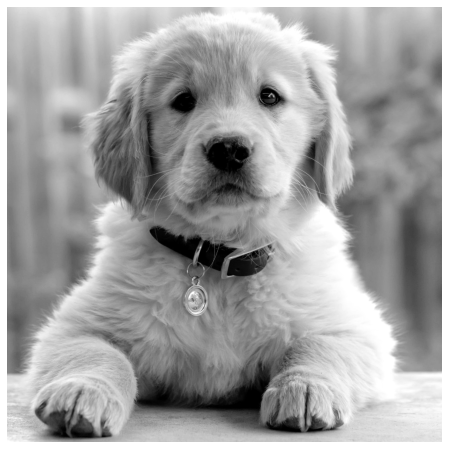

In [2]:
plt. rcParams['figure.figsize'] = [16,8]
A = imread('dog.jpg')
X = np.mean(A,-1) # Convert RGB to grayscale
rowind, colind = np.unravel_index(X.argmax(), X.shape)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

<!-- Code SVD -->
U , S , VT = np.linalg.svd(X,full_matries= false)
S = np.diag(S)

In [3]:
U , S , VT = np.linalg.svd(X,full_matrices= False)
S = np.diag(S)

In [4]:
print('Matrix U',U)

Matrix U [[-0.04144916 -0.02434065 -0.04519777 ... -0.06336539  0.03565457
  -0.04330816]
 [-0.04136846 -0.02415029 -0.04527256 ...  0.04111354 -0.06074795
   0.01574594]
 [-0.04125503 -0.02398293 -0.04530973 ... -0.08673643  0.0078379
   0.00772263]
 ...
 [-0.03915668 -0.00373979 -0.05151349 ...  0.01473198 -0.03892799
  -0.01161172]
 [-0.039477   -0.00335942 -0.05138336 ... -0.01204915 -0.00429387
   0.06394638]
 [-0.03972562 -0.00325258 -0.05103419 ...  0.02114744  0.00923427
  -0.02922819]]


In [5]:
print('Matrix S',S)

Matrix S [[1.58592563e+05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.38484241e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.01881037e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.52632880e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.52257902e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.79803779e-03]]


In [6]:
print('Matrix VT',VT)

Matrix VT [[-0.031435   -0.03137472 -0.03125607 ... -0.02942354 -0.02940578
  -0.02938256]
 [ 0.02562741  0.02546674  0.02460397 ...  0.04710874  0.04726805
   0.04733603]
 [-0.01037129 -0.01105542 -0.01146493 ... -0.02231357 -0.02235612
  -0.02237835]
 ...
 [-0.00211017  0.03127883 -0.05338577 ...  0.0648061  -0.11407337
   0.04168284]
 [-0.00629711 -0.01107734  0.02432708 ...  0.02619526  0.06169722
  -0.04144339]
 [-0.01581946 -0.00219467  0.01328263 ... -0.03056504 -0.05967033
   0.07051346]]


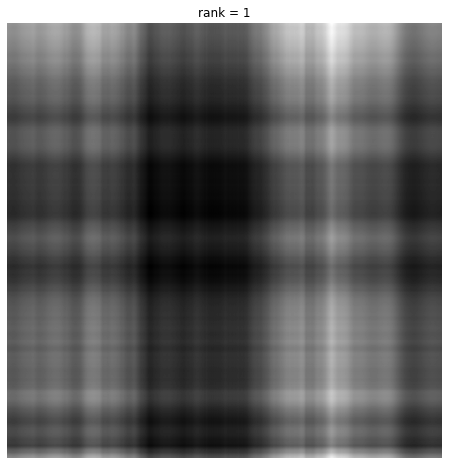

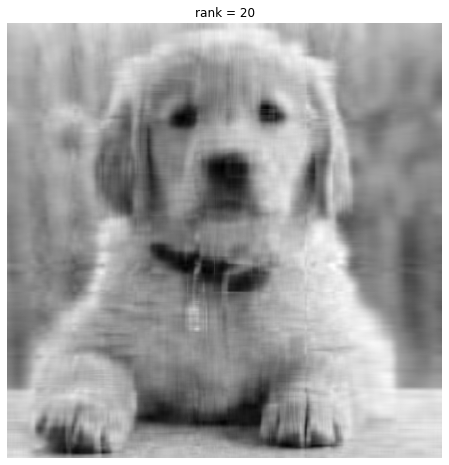

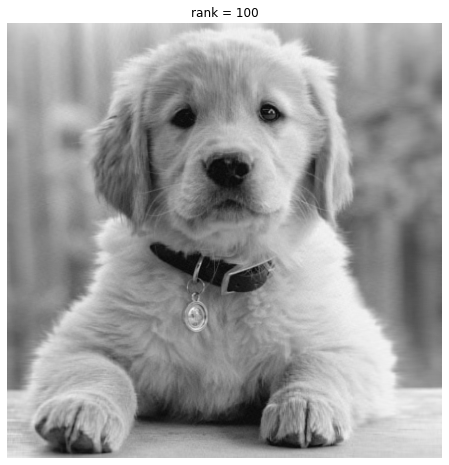

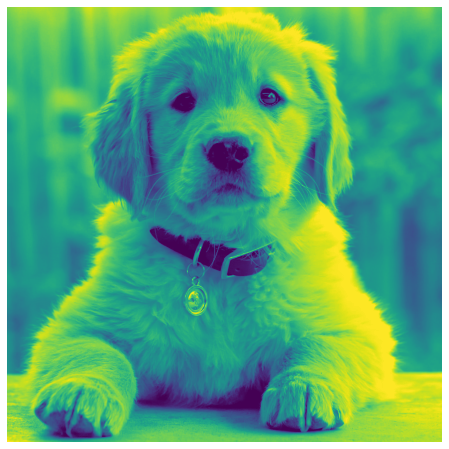

In [7]:
j = 0 
for num_components in (1,20,100):
    #Construct approximate matrix
    Xap = U[:,:num_components] @ S[0:num_components,:num_components] @ VT[:num_components,:]
    plt.figure(j+1)
    j+=1
    img = plt.imshow(Xap)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('rank = '+str(num_components))
#     plt.title(np.diag(S)/np.sum(np.diag(S))+'storage')
    plt.show()
img = plt.imshow(X) 

plt.axis('off')
plt.show()

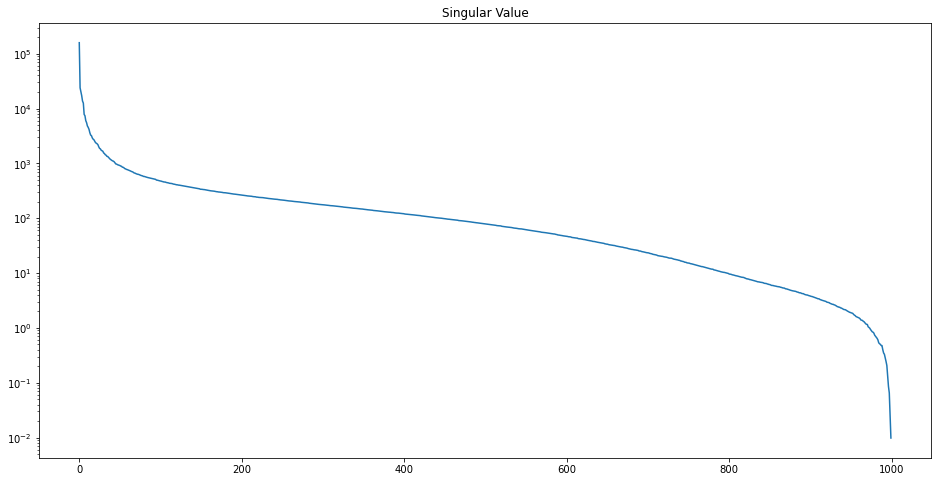

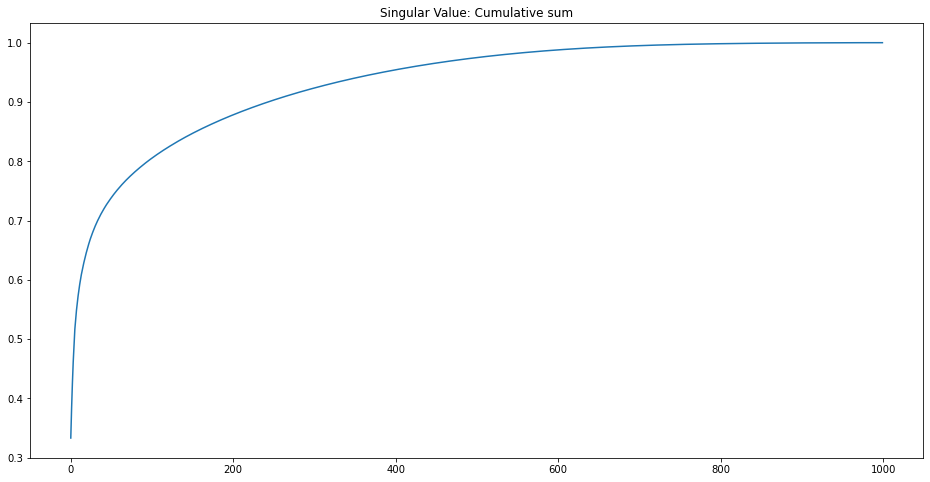

In [8]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Value')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Value: Cumulative sum')
plt.show()

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import numpy as np 
import os

plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size':18})

theta = np.array([np.pi/15,-np.pi/9,-np.pi/20])
Sigma = np.diag([3,1,0.5])

#Rotate about x axis 

Rx = np.array([[1, 0, 0], # rotate about x-axis
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]]);


Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])], # rotate about y-axis
                [0 ,1 ,0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]) ,0], # rotate about z-axis
                [np.sin(theta[2]), np.cos(theta[2]), 0],
                [0, 0, 1]])
#Rotate and scale 
X = Rz @ Ry @ Rx @ Sigma;
U , S , VT = np.linalg.svd(X,full_matrices= False)
X = U @ np.diag(S)

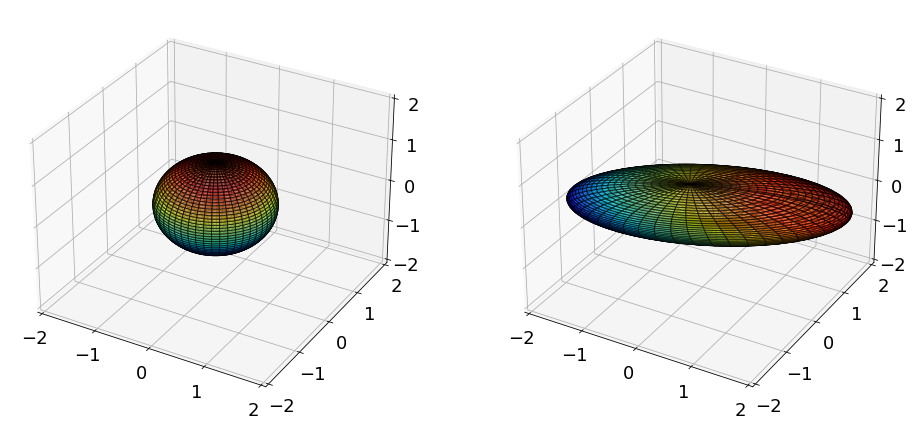

In [19]:
# Plot sphere 
fig = plt.figure()
axl = fig.add_subplot(121,projection ='3d')
u = np.linspace(-np.pi,np.pi,100)
v = np.linspace(0,np.pi,100)
x = np.outer(np.cos(u),np.sin(v))
y = np.outer(np.sin(u),np.sin(v))
z = np.outer(np.ones(np.size(u)),np.cos(v))

# plot the surface
surf1 = axl.plot_surface(x,y,z,cmap='jet',alpha=0.6)
surf1.set_edgecolor('k')
axl.set_xlim3d(-2,2)
axl.set_ylim3d(-2,2)
axl.set_zlim3d(-2,2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range (x.shape[0]):
    for j in range (x.shape[1]):
        vec = [x[i,j],y[i,j],z[i,j]]
        vecR = X @ vec
        xR[i,j] =vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]

ax2 = fig.add_subplot(122, projection ='3d')        
surf2 = ax2.plot_surface(xR,yR,zR, cmap='jet',alpha=0.6)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2,2)
ax2.set_ylim3d(-2,2)
ax2.set_zlim3d(-2,2)
plt.show()        